In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde as gkde
import seaborn as sns
%matplotlib notebook

# Constructing the Gaussian Kernel Density Estimation for 2 channels. 

In this case, the [scipy.stats] library is used for the estimation. It is advice to use [KDEpy.FFTKDE] for the estimation. Reader who is familiar with this library is advice to use it. Modification can be made at "#kernel density estimation" part. 

<b>NOTE:</b> the code is just a modification from <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html'>this</a>, reader is encouraged to read though it. 

<b>NOTE:</b> there are a few options in performing the kernel density estimation. Reader may refer to <a href='https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/'>this</a> for further details. In this script, [scipy.stats] is used due to its general known library.  

## first few points example

<IPython.core.display.Javascript object>


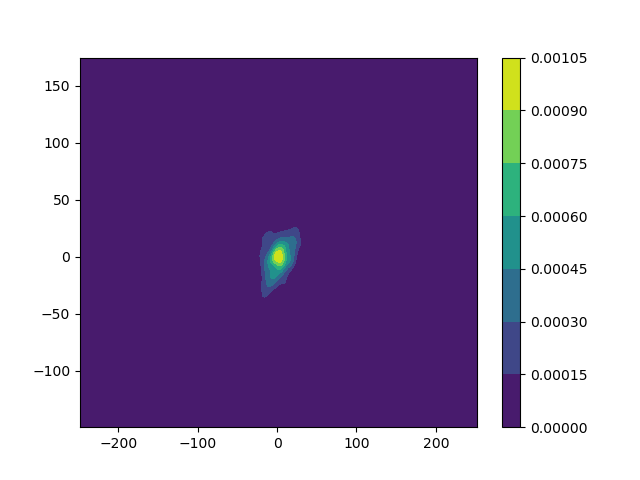

Area under the graph:  0.9960039999999997


In [2]:
data = pd.read_csv('Case 17.txt')
datax = data['TIME']
datay1 = data['C3']
datay2 = data['C4']
datapoint = 500

#kernel density estimation
evaly1 = np.linspace(np.min(datay1), np.max(datay1), datapoint)
evaly2 = np.linspace(np.min(datay2), np.max(datay2), datapoint) 

X, Y = np.meshgrid(evaly1, evaly2) 
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([datay1[1:1000], datay2[1:1000]])
kernel = gkde(values) 
Z = np.reshape(kernel.pdf(positions).T, X.shape) 

#plotting the joint probability distribution
plt.figure()
plt.contourf(X, Y, Z) 
plt.colorbar()
plt.show()

#calculate the total probability as checking
dify1 = (np.max(datay1)-np.min(datay1))/(datapoint)
dify2 = (np.max(datay2)-np.min(datay2))/(datapoint)

print('Area under the graph: ', np.sum(Z*dify1*dify2))

## Marginal probability distribution
With the obtained [joint probability distribution] from above, it allows us to calculate the [marginal probability distribution] with the following expression: 

$p_{X}(x) = \int dy \ p_{XY}(x, y)$ 

$p_{Y}(y) = \int dx \ p_{XY}(x, y)$

<IPython.core.display.Javascript object>


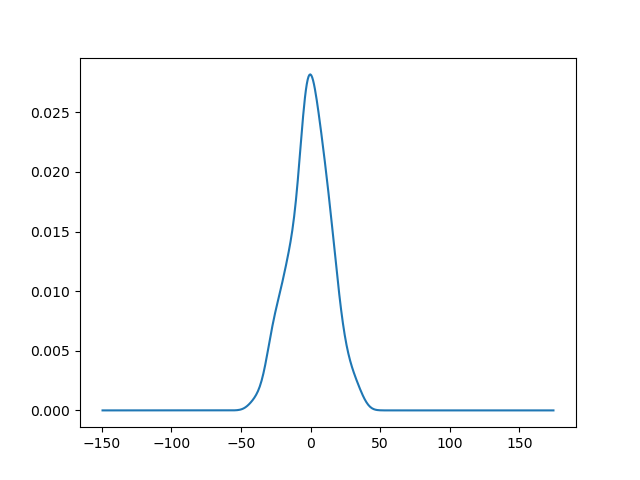

<IPython.core.display.Javascript object>


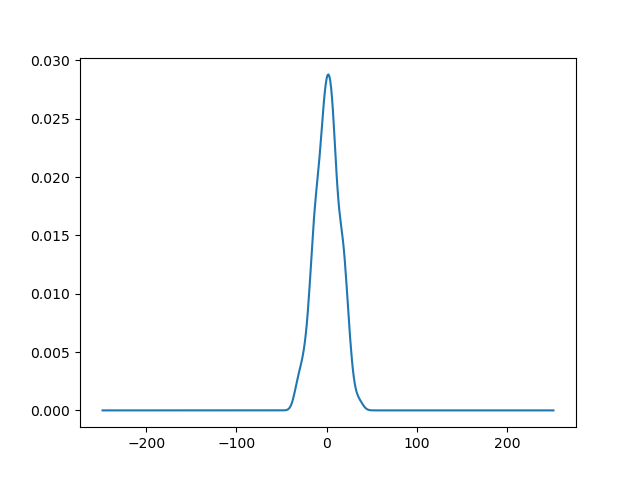

Total probability for y:  0.9960039999999999
Total probability for x:  0.9960039999999999


In [3]:
newz1 = np.zeros(datapoint)
newz2 = np.zeros(datapoint)
ztrans = np.transpose(Z) 

#evaluate the marginal probability distribution
for i in range(len(Z)):
    valz1 = np.sum(Z[i]*dify1)
    newz1[i] = valz1 
    
for j in range(len(ztrans)):
    valz2 = np.sum(ztrans[j]*dify2)
    newz2[j] = valz2

#plotting graph
plt.figure()
plt.plot(evaly2, newz1)
plt.show()

plt.figure()
plt.plot(evaly1, newz2)
plt.show()

#calculating the total probability as checking
print('Total probability for y: ', np.sum(newz1*dify2))
print('Total probability for x: ', np.sum(newz2*dify1))

## Should use this method of "summing" to get the [marginal PDFs] 
Comparison is done to check the result. 

<b>NOTE:</b> the trick is the "axis" of the [np.sum]

<IPython.core.display.Javascript object>


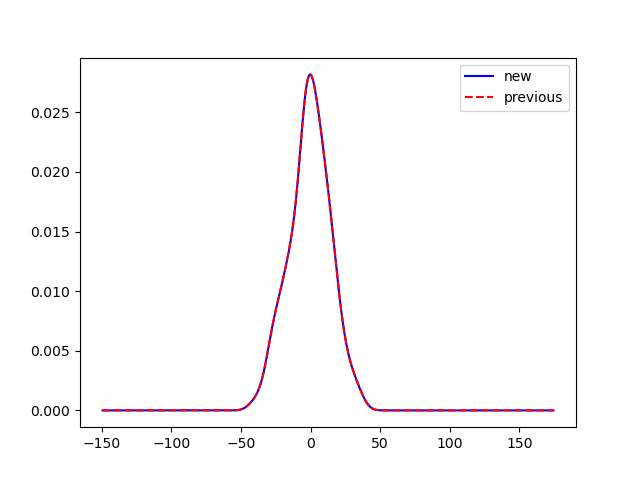

<IPython.core.display.Javascript object>


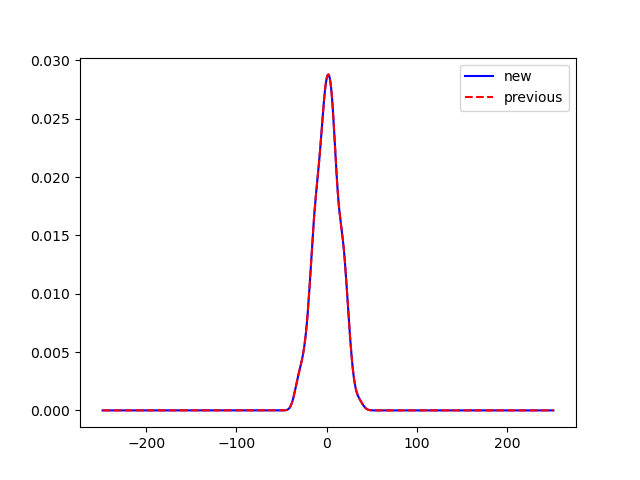

(500,)
(500, 500)


In [4]:
#lolz1=[]
#lolz2=[]

lolz2 = np.sum(Z*dify1, axis=1)
lolz1 = np.sum(Z*dify2, axis=0)

plt.figure()
plt.plot(evaly2, lolz2, 'b-', label='new')
plt.plot(evaly2, newz1, 'r--', label='previous')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(evaly1, lolz1, 'b-', label='new')
plt.plot(evaly1, newz2, 'r--', label='previous')
plt.legend(loc='best')
plt.show()

print(lolz1.shape)
print(Z.shape)

## Comparing the marginal probability distribution
In this part, the calculated [marginal probability distribution] is compared with the [probability density distribution] of each channels. This is conducted with the idea of checking the obtained results. 

<IPython.core.display.Javascript object>


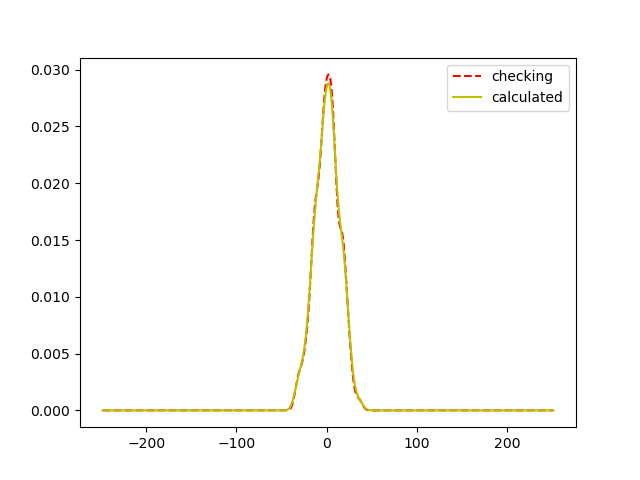

<IPython.core.display.Javascript object>


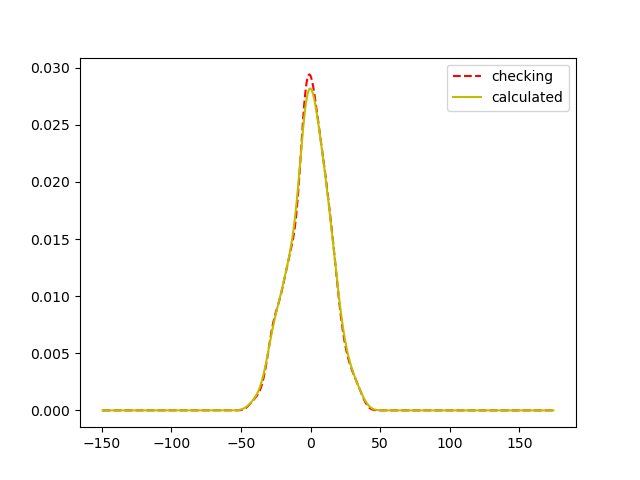

Error for first graph (Euclidean distance):  0.004102111899320821
Error for second graph (Euclidean distance):  0.004969573260889361


In [5]:
checky1=np.zeros(datapoint)
checky2=np.zeros(datapoint)

#kernel density estimation for single channel as reference 
evaly1 = np.linspace(np.min(datay1), np.max(datay1), datapoint)
evaly2 = np.linspace(np.min(datay2), np.max(datay2), datapoint) 

ydata1 = datay1[1:1000]
ydata2 = datay2[1:1000]

ykde1 = gkde(ydata1)
ykde2 = gkde(ydata2)

prob_ykde1 = ykde1.pdf(evaly1)
prob_ykde2 = ykde2.pdf(evaly2)

checky1 = prob_ykde1
checky2 = prob_ykde2

#plotting the graphs for comparison 
plt.figure()
plt.plot(evaly1, checky1, 'r--', label='checking')
plt.plot(evaly1, newz2, 'y-', label='calculated')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(evaly2, checky2, 'r--', label='checking')
plt.plot(evaly2, newz1, 'y-', label='calculated')
plt.legend(loc='best')
plt.show()

dist1 = np.linalg.norm(checky1-newz2)
dist2 = np.linalg.norm(checky2-newz1)
print('Error for first graph (Euclidean distance): ', dist1)
print('Error for second graph (Euclidean distance): ', dist2)

## Is the joint probability distribution independent to each other? 
In this part, the relation of the probability distribution is evaluated. If the [joint probability distribution] is constructed by two [marginal distributions] that are independent to each other, it will have the following relationship: 

$p_{XY}(x,y,t) = p_{X}(x, t) p_{Y}(y, t)$

<IPython.core.display.Javascript object>


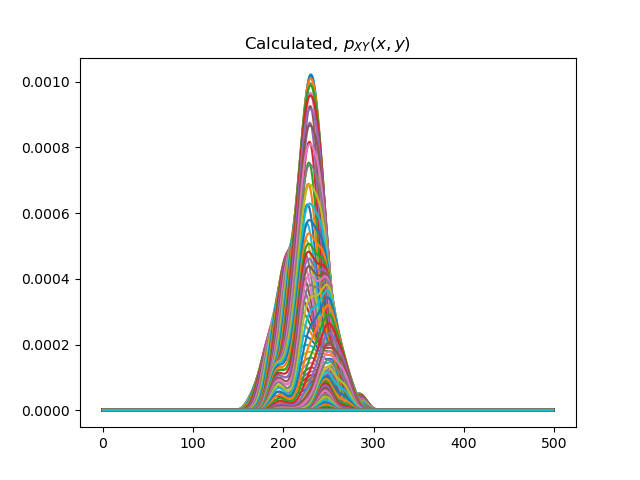

<IPython.core.display.Javascript object>


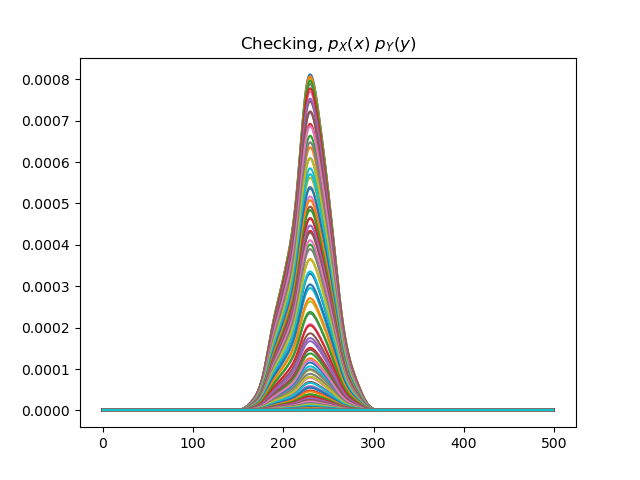

<IPython.core.display.Javascript object>


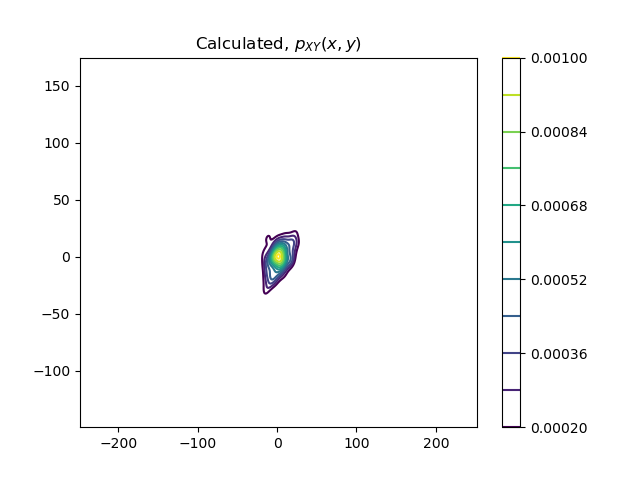

<IPython.core.display.Javascript object>


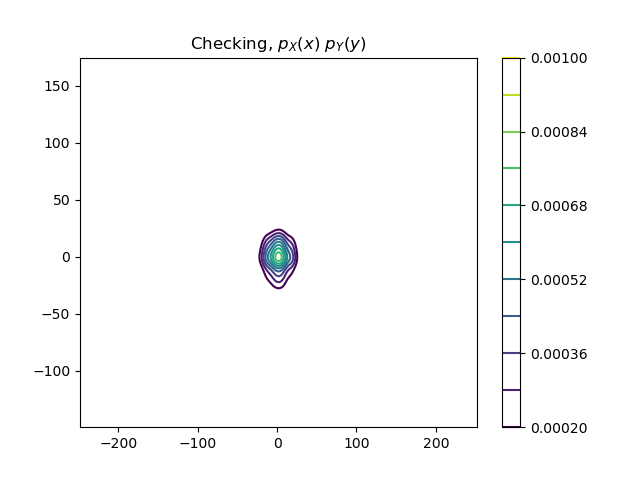

Are the distribution independent to each other:  False
(500, 500)
(500, 500)


In [6]:
plt.figure()
plt.plot(Z)
plt.title('Calculated, $p_{XY}(x, y)$')
plt.show()

#calculation of multiplication of marginal probability of 2 channels 
prodz = np.zeros((len(newz1), len(newz2)))
for i in range(len(newz1)):
    for j in range(len(newz2)):
        ansprodz = newz1[i]*newz2[j]
        prodz[i][j] = ansprodz

plt.figure()
plt.plot(prodz)
plt.title('Checking, $p_{X}(x) \ p_{Y}(y)$')
plt.show()

plt.figure()
plt.contour(X, Y, Z, levels=np.linspace(0.0002,0.001,11))
plt.title('Calculated, $p_{XY}(x, y)$')
plt.colorbar()
plt.show()

plt.figure()
plt.contour(X, Y, prodz, levels=np.linspace(0.0002,0.001,11))
plt.title('Checking, $p_{X}(x) \ p_{Y}(y)$')
plt.colorbar()
plt.show()

print('Are the distribution independent to each other: ', np.array_equal(Z, prodz))

print(prodz.shape)
print(Z.shape)

# Causal information rate

Causal information rate is the evaluation of the causality of information rate of one variable towards the other variable. For instance, in the case of [bivariate joint probability, $p(X_j, t_1; X_i, t)$], it is possible to evaluate the "influences" of one variable ($X_i$) towards the information rate of the other variable ($X_j$). The [causal information rate, $\Gamma_{i \rightarrow j}$] is defined as: 

$\Gamma_{i \rightarrow j} \equiv \Gamma^*_j - \Gamma_j  \\
\mathcal{E}_j \equiv \Gamma_j(t)^2 = \int dX_j \ p(X_j, t) \left[ \partial_t \ln{(p(X_j, t))} \right]^2 \\
\mathcal{E}^*_j \equiv \Gamma^*_j(t)^2 = \lim_{t_1 \rightarrow t^+} \int dX_i dX_j \ p(X_j, t_1; X_i, t) \left[ \partial_{t_1} \ln{(p(X_j, t_1; X_i, t))} \right]^2$ 

For the purpose of computing the equation, discrete version of [causal information rate, $\Gamma_{i \rightarrow j}$] is presented as follows: 

$\Gamma_{i \rightarrow j} \equiv \Gamma^*_j - \Gamma_j  \\
\mathcal{E}_j \equiv \Gamma_j(t)^2 = 4 \frac{s_j}{h^2} \sum_{j} \left[ \sqrt{p^j_{i+1}} - \sqrt{p^j_i} \right]^2 \\
\mathcal{E}^*_j \equiv \Gamma^*_j(t)^2 = 4 \frac{s_i s_j}{h^2} \sum_{ij} \left[ \sqrt{p^{ij}_{t+1}} - \sqrt{p^{ij}_{t}} \right]^2$

## Construct two different time of [joint PDFs] and [marginal PDFs]
<b>NOTE:</b> this is required as the calculation $\mathcal{E}^{*}_{j}$ and $\mathcal{E}_{j}$ can only be calculated at two different time (refer to the dicrete version of [causal information rate]). 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import gaussian_kde as gkde
%matplotlib notebook 

data = pd.read_csv('Case 17.txt')
datax = data['TIME']
datay1 = data['C3']
datay2 = data['C4']
datapoint = 500 

#kernel density estimation 
evaly1 = np.linspace(np.min(datay1), np.max(datay1), datapoint)
evaly2 = np.linspace(np.min(datay2), np.max(datay2), datapoint)
X, Y = np.meshgrid(evaly1, evaly2)
positions = np.vstack([X.ravel(), Y.ravel()])

#joint PDF for t=1
valuest1 = np.vstack([datay1[0:1000], datay2[0:1000]]) #data from the range(0, 1000)
kernelt1 = gkde(valuest1) 
Zt1 = np.reshape(kernelt1.pdf(positions).T, X.shape)

#joint PDF for t=2 
valuest2 = np.vstack([datay1[99:1099], datay2[99:1099]]) #data from the range(99, 1099)
kernelt2 = gkde(valuest2)
Zt2 = np.reshape(kernelt2.pdf(positions).T, X.shape) 


#the finite increment of the datay1 and datay2
dify1 = (np.max(datay1)-np.min(datay1))/(datapoint)
dify2 = (np.max(datay2)-np.min(datay2))/(datapoint)

#marginal PDF for t=1
newz1t1 = np.zeros(datapoint)
newz2t1 = np.zeros(datapoint) 
ztranst1 = np.transpose(Zt1)

#evaluate the marginal probability distribution 
for i in range(0, len(Zt1)): 
    valz1t1 = np.sum(Zt1[i]*dify1)
    newz1t1[i] = valz1t1 
    
for j in range(0, len(ztranst1)):
    valz2t1 = np.sum(ztranst1[j]*dify2) 
    newz2t1[j] = valz2t1 
    
#marginal PDF for t=2 
newz1t2 = np.zeros(datapoint) 
newz2t2 = np.zeros(datapoint) 
ztranst2 = np.transpose(Zt2) 

#evaluate the marginal probability distribution 
for i in range(0, len(Zt2)): 
    valz1t2 = np.sum(Zt2[i]*dify1)
    newz1t2[i] = valz1t2 
    
for j in range(0, len(ztranst2)): 
    valz2t2 = np.sum(ztranst2[j]*dify2) 
    newz2t2[j] = valz2t2 

#causal information rate calculation 
#calculation for $\mathcal{E}_{j}$
sqrt1 = np.sqrt(newz1t1)
sqrt2 = np.sqrt(newz1t2) 
ans = (sqrt2 - sqrt1)**2 
dift = datax[1]-datax[0] 
rate2 = 4*np.sum(ans*((dify2)/(dift**2)))

#calculation for $\mathcal{E}^{*}_{j}$ 
sqrt1f = np.sqrt(Zt1) 
sqrt2f = np.sqrt(Zt2) 
ansf = (sqrt2f - sqrt1f)**2 
dift = datax[1]-datax[0] 
rate2f = 4*np.sum(ansf*((dify1*dify2)/(dift**2)))

#calculation for $\Gamma_{i \rightarrow j}$ 
gammaf = np.sqrt(rate2f) 
gamma = np.sqrt(rate2)
gamma_causal = gammaf - gamma 

print('Gamma_(i -> j): ', gamma_causal)

Gamma_(i -> j):  78.05567802674744


## Whole chain of data for 2 channels 
This is basically the same as above. In this part, it is considering the whole period of data instead of just 2 different time. Basically, the [for-loop] is used to compute the [joint PDFs], [marginal PDFs], [$\Gamma^{*}_{j}$], and [$\Gamma_{j}$] for each period. Later, the [$\Gamma_{i \rightarrow j}$] is calculated for each period. 

<b>NOTE:</b> the author has "shorten" the code as compare to "2 different time" because author only realized the "easy way" after the above section. Apology for the confusion. 

<b>NOTE:</b> please take note of [interval of sampling the KDE], [points of sampling the KDE], and [points/values of PDFs]. It may be not appropiate to use that [interval/values] for actual analysis. However, in this case it this script is served as example ONLY for visualing the result faster. 

<b>NOTE:</b> the [raw data] in this case is not filter for having to get the result faster as this script is served as example. 

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde as gkde 
%matplotlib notebook

#import data
data = pd.read_csv('Case 17.txt')
datax = data['TIME']
datay1 = data['C3']
datay2 = data['C4'] 
datapoint = 100 #'number' of points for the estimated PDFs; check the code start from [evaly1]
gap = 1000 #data point that used for kernel density estimation


#joint PDFs for the whole time
resultpdf=[]
newdatax=[]

evaly1 = np.linspace(np.min(datay1), np.max(datay1), datapoint) 
evaly2 = np.linspace(np.min(datay2), np.max(datay2), datapoint)
X, Y = np.meshgrid(evaly1, evaly2)
positions = np.vstack([X.ravel(), Y.ravel()])

for i in range(0, len(datax)-gap+1, 100):
    if datay1[i]==0: 
        datay1[i]=1E-14 
    else: 
        datay1[i]=datay1[i] 
        
    if datay2[i]==0:
        datay2[i]=1E-14
    else: 
        datay2[i]=datay2[i]
        
    values = np.vstack([datay1[i:i+gap], datay2[i:i+gap]])
    kernel = gkde(values)
    Z = np.reshape(kernel.pdf(positions).T, X.shape) 
    
    resultpdf.append(Z)
    newdatax.append(datax[i])
    
resultpdf = np.array(resultpdf) #save the data for joint PDFs for later use
newdatax = np.array(newdatax) #save the data for 'new time' for later use 


#marginal PDFs 
margi_pdfy1 = []
margi_pdfy2 = []
dify1 = (np.max(datay1)-np.min(datay1))/(datapoint)
dify2 = (np.max(datay2)-np.min(datay2))/(datapoint)

for i in range(0, len(resultpdf)):
    margi_pdfy1.append(np.sum(resultpdf[i]*dify2, axis=0))
    margi_pdfy2.append(np.sum(resultpdf[i]*dify1, axis=1))
    
margi_pdfy1 = np.array(margi_pdfy1)
margi_pdfy2 = np.array(margi_pdfy2)
    
    
#causal information rate calculation 
rate2=[]
rate2f=[]
dift = datax[1]-datax[0]

#calculation for $\mathcal{E}_{j}$ and $\mathcal{E}^{*}_{j}$ 
for i in range(0, len(resultpdf)-1):
    sqrt1 = np.sqrt(margi_pdfy2[i])
    sqrt2 = np.sqrt(margi_pdfy2[i+1])
    ans = (sqrt2-sqrt1)**2
    rate2.append(4*np.sum(ans*((dify2)/(dift**2)))) #$\mathcal{E}_{j}$ part
    
    sqrt1f = np.sqrt(resultpdf[i])
    sqrt2f = np.sqrt(resultpdf[i+1])
    ansf = (sqrt2f-sqrt1f)**2
    rate2f.append(4*np.sum(ansf*((dify1*dify2)/(dift**2)))) #$\mathcal{E}^{*}_{j}$ part
    
rate2 = np.array(rate2)
rate2f = np.array(rate2f)

#calculation for $\Gamma_{i \rightarrow j}$ 
gammaf = np.sqrt(rate2f)
gamma = np.sqrt(rate2)
gamma_causal = gammaf-gamma 

# Plotting of $\mathcal{E}_{i \rightarrow j}$ and $\sqrt{\mathcal{E}_{i \rightarrow j}}$ 
The [causal of the square of information rate], $\mathcal{E}_{i \rightarrow j}$ is defined as: 

$\mathcal{E}_{i \rightarrow j} = \mathcal{E}^{*}_{j} - \mathcal{E}_{j}$

Hence, the square root of the [causal of the square of information rate] will simply be the square root of the above equation: $\sqrt{\mathcal{E}_{i \rightarrow j}}$

<IPython.core.display.Javascript object>


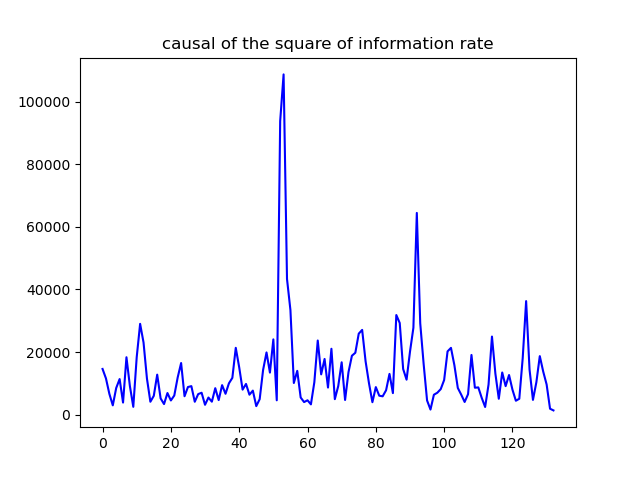

<IPython.core.display.Javascript object>


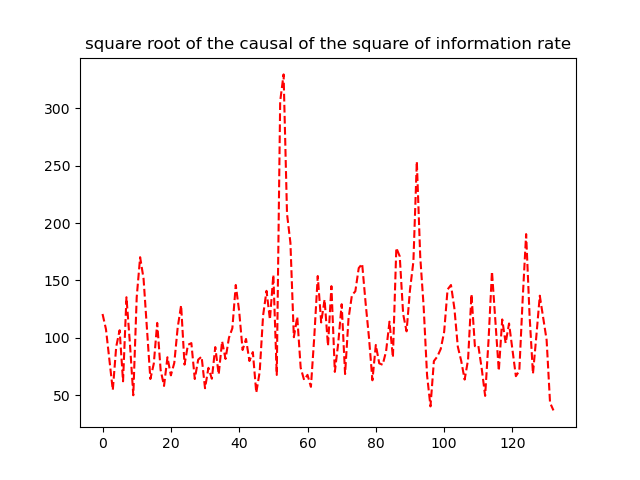

In [9]:
mathE = rate2f - rate2
sqrt_mathE = np.sqrt(mathE)

plt.figure()
plt.plot(mathE, 'b-', label='$\mathcal{E}$')
#plt.legend(loc='best')
plt.title('causal of the square of information rate')
plt.show()

plt.figure()
plt.plot(sqrt_mathE, 'r--', label='$\sqrt{\mathcal{E}$')
#plt.legend(loc='best')
plt.title('square root of the causal of the square of information rate')
plt.show()

## Plot out the Causal information rate along the time

<IPython.core.display.Javascript object>


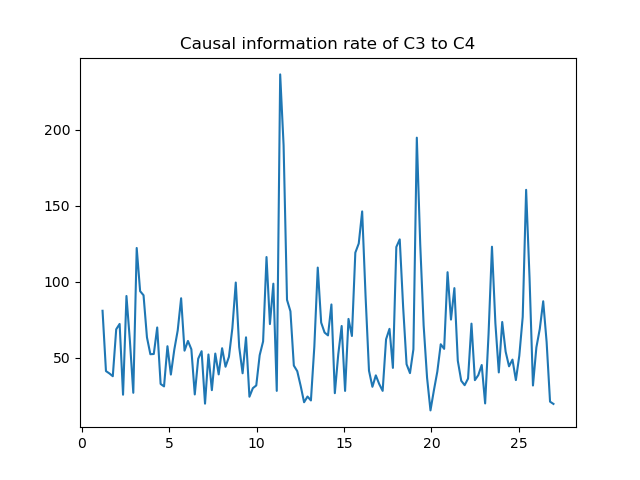

In [10]:
plt.figure()
plt.plot(np.delete(newdatax, 0), gamma_causal)
plt.title('Causal information rate of C3 to C4')
plt.show()

<IPython.core.display.Javascript object>


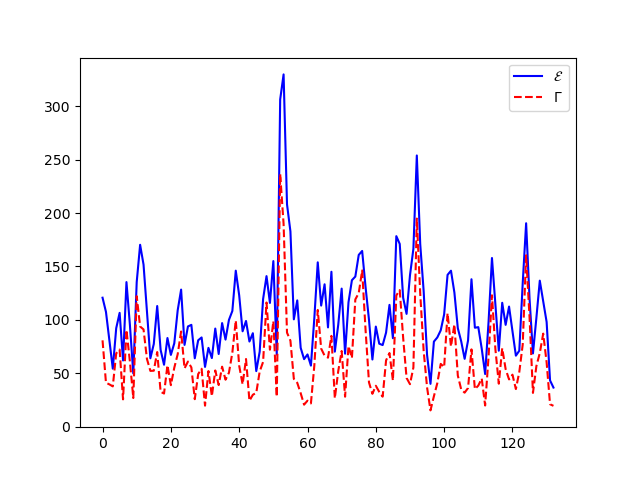

In [11]:
plt.figure()
plt.plot(sqrt_mathE, 'b-', label='$\mathcal{E}$')
plt.plot(gamma_causal, 'r--', label='$\Gamma$')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


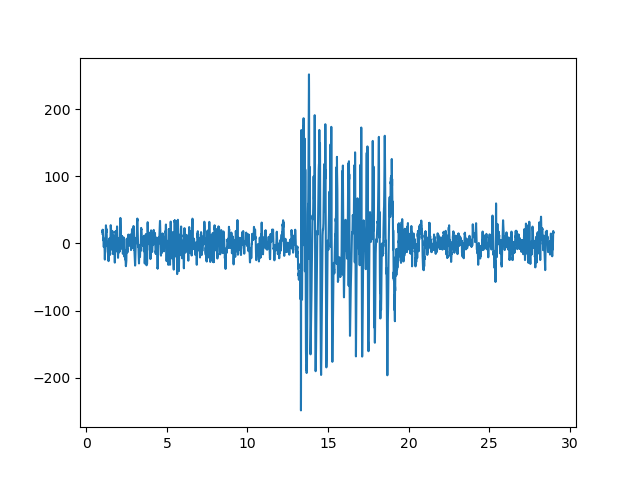

<IPython.core.display.Javascript object>


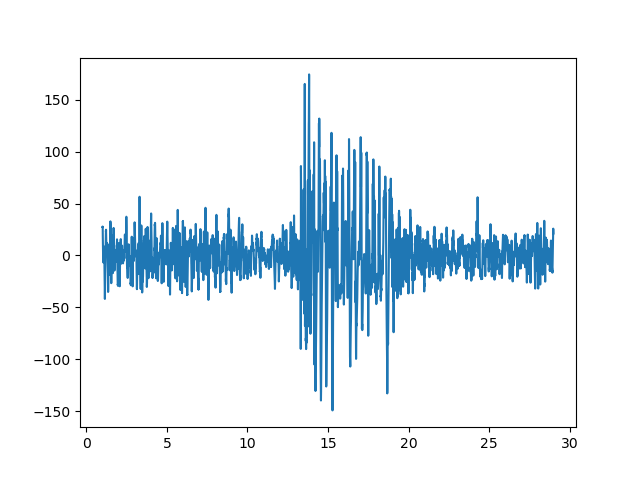

In [12]:
plt.figure()
plt.plot(datax, datay1, label='C3')
plt.show()

plt.figure()
plt.plot(datax, datay2, label='C4')
plt.show()

# Causal information length 
Information length, $\mathcal{L}_{i \rightarrow j}$ can be obtained by integrating the [information rate] with respect to [time]: 

$\mathcal{L}_{i \rightarrow j} = \int^{t}_{0} dt_1 \ \Gamma_{i \rightarrow j}(t_1)$

For the detail of the equation discussion, reader may refer to <a href='https://www.mdpi.com/1099-4300/23/11/1393/htm'>this</a>. 

<IPython.core.display.Javascript object>


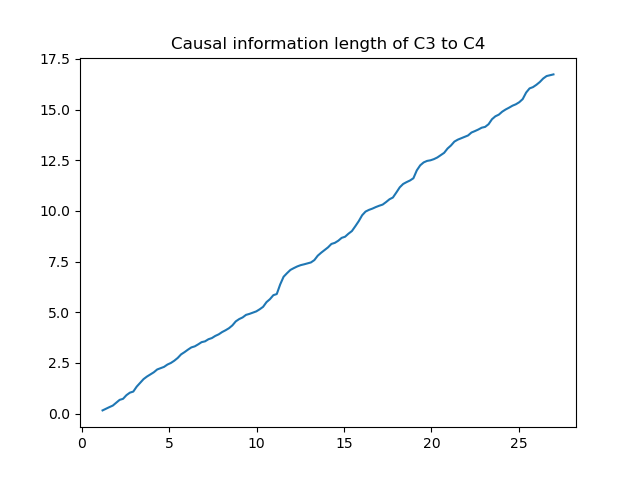

In [13]:
length = np.cumsum(gamma_causal*dift)

plt.figure()
plt.plot(np.delete(newdatax, 0), length)
plt.title('Causal information length of C3 to C4')
plt.show()